In [33]:
import pandas as pd        
import numpy as np         
import matplotlib.pyplot as plt        
import seaborn as  sns 

In [34]:
df = pd.read_csv('/Users/anthea/Downloads/Netflix_Userbase.csv')

In [35]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [36]:
df = df.dropna()

In [37]:
df.isnull().sum()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64

In [38]:
df.count()

User ID              2500
Subscription Type    2500
Monthly Revenue      2500
Join Date            2500
Last Payment Date    2500
Country              2500
Age                  2500
Gender               2500
Device               2500
Plan Duration        2500
dtype: int64

In [39]:
df.shape

(2500, 10)

## QUESTION 3A

In [44]:
print(df['Subscription Type'].unique())

['Basic' 'Premium' 'Standard']


## QUESTION 3B

In [45]:
print(df['Plan Duration'].unique())

['1 Month']


## QUESTION 3C

In [46]:
print(df['Monthly Revenue'].unique())

[10 15 12 13 11 14]


## QUESTION 4A: SALES PER MONTH

In [53]:
df['Join Date'] = pd.to_datetime(df['Join Date'], format='%d-%m-%y')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format='%d-%m-%y')

In [55]:
def generate_monthly_revenue(row):
    months = pd.date_range(start=row['Join Date'], end=row['Last Payment Date'], freq='MS').to_period('M')
    revenue_data = pd.DataFrame({
        'YearMonth': months,
        'Monthly Revenue': row['Monthly Revenue']
    })
    
    return revenue_data

In [56]:
all_monthly_revenues = pd.concat([generate_monthly_revenue(row) for idx, row in df.iterrows()])

In [57]:
total_monthly_revenue = all_monthly_revenues.groupby('YearMonth')['Monthly Revenue'].sum().reset_index()

/var/folders/c9/83t_p7011dv7z71pbzhhwr700000gn/T/ipykernel_29034/4223827558.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='YearMonth', y='Monthly Revenue', data=total_monthly_revenue, palette='Blues_d')


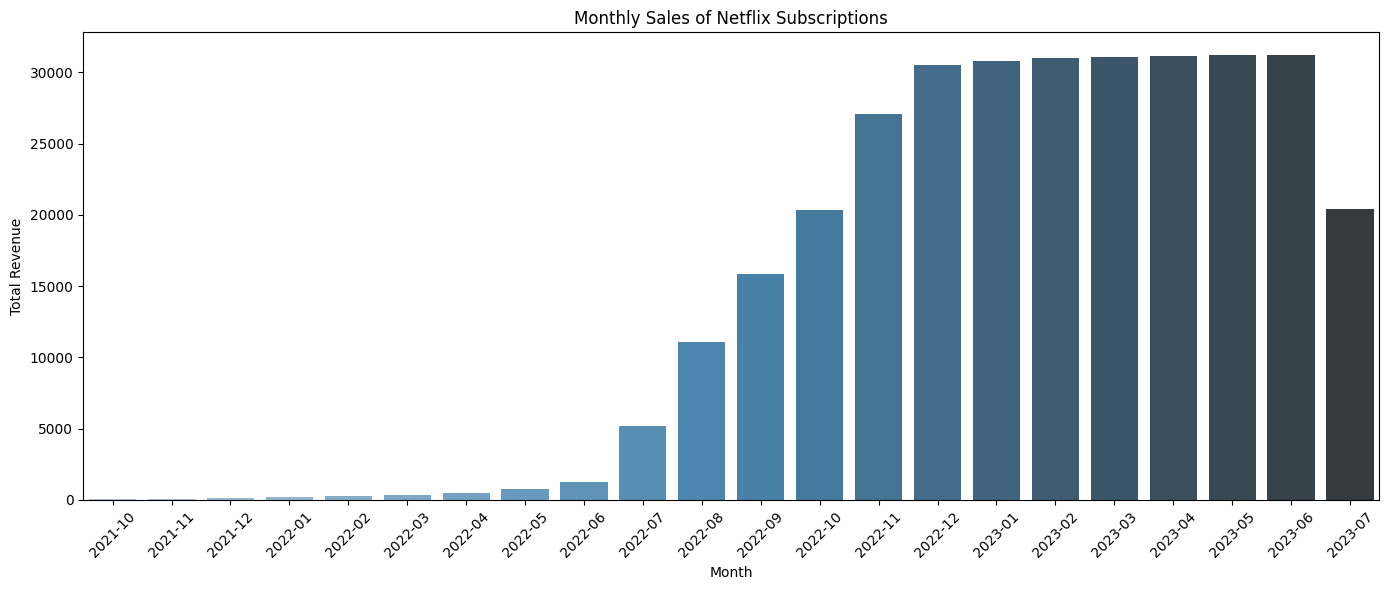

In [67]:
plt.figure(figsize=(14,6))
sns.barplot(x='YearMonth', y='Monthly Revenue', data=total_monthly_revenue, palette='Blues_d')

plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.title('Monthly Sales of Netflix Subscriptions')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

## QUESTION 4B: MOST POPULAR SUBSCRIPTION TYPE

In [59]:
subscription_counts = df['Subscription Type'].value_counts().reset_index()

In [60]:
subscription_counts.columns = ['Subscription Type', 'Count']

/var/folders/c9/83t_p7011dv7z71pbzhhwr700000gn/T/ipykernel_29034/1464621653.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Subscription Type', y='Count', data=subscription_counts, palette='coolwarm')


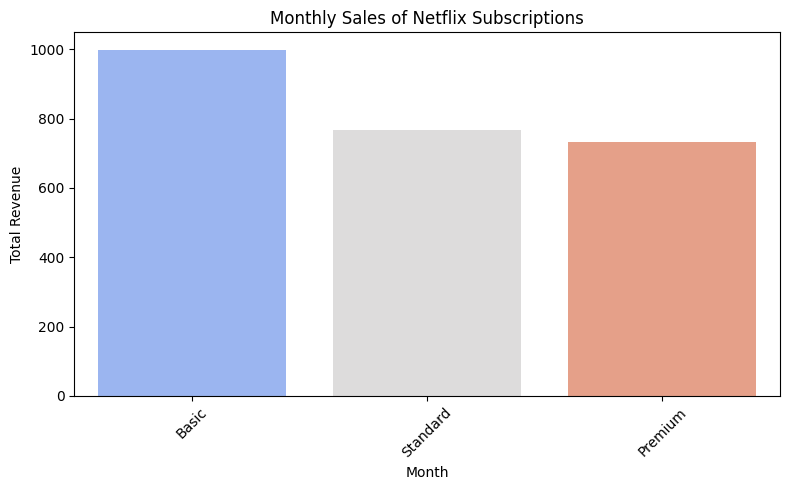

In [66]:
plt.figure(figsize=(8,5))
sns.barplot(x='Subscription Type', y='Count', data=subscription_counts, palette='coolwarm')

plt.xticks(rotation=45)  
plt.title('Monthly Sales of Netflix Subscriptions')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

## QUESTION 4C: GENDER VS SUBSCRIPTION TYPE

In [68]:
gender_subscription_counts = df.groupby(['Gender', 'Subscription Type']).size().reset_index(name='Count')

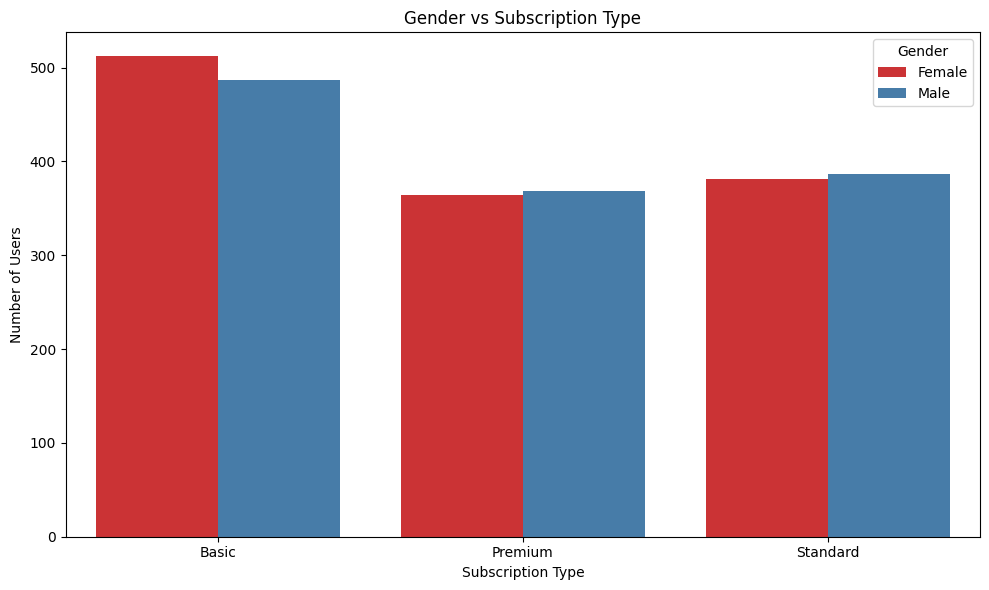

In [72]:
plt.figure(figsize=(10,6))
sns.barplot(x='Subscription Type', y='Count', hue='Gender', data=gender_subscription_counts, palette='Set1')

plt.title('Gender vs Subscription Type')
plt.xlabel('Subscription Type')
plt.ylabel('Number of Users')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

## QUESTION 4D: NUMBER OF USERS VS COUNTRY

In [73]:
country_counts = df['Country'].value_counts().reset_index()

In [74]:
country_counts.columns = ['Country', 'Number of Users']

/var/folders/c9/83t_p7011dv7z71pbzhhwr700000gn/T/ipykernel_29034/2453377297.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Users', y='Country', data=country_counts, palette='pastel')


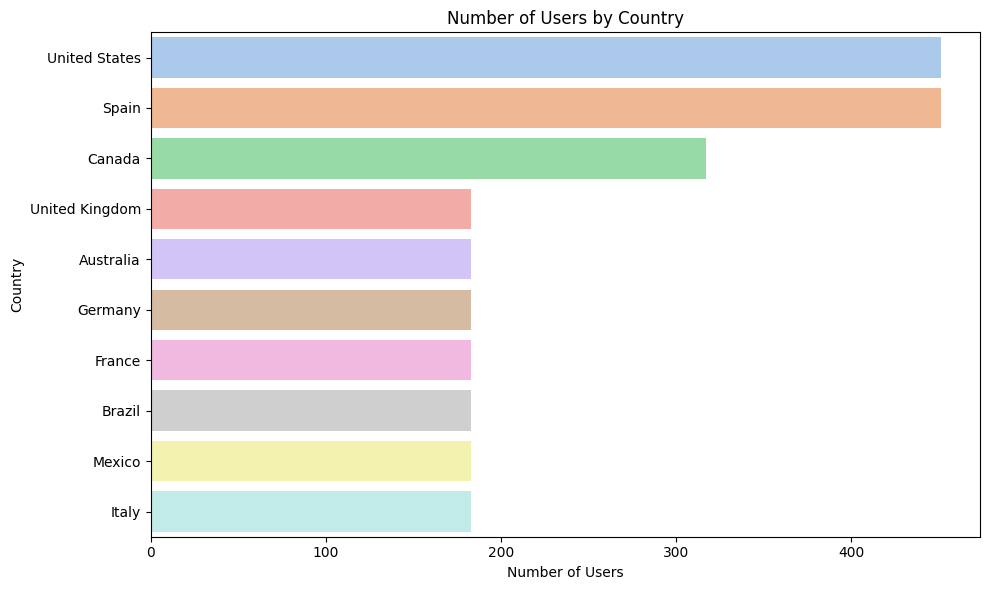

In [78]:
plt.figure(figsize=(10,6))
sns.barplot(x='Number of Users', y='Country', data=country_counts, palette='pastel')

plt.title('Number of Users by Country')
plt.xlabel('Number of Users')
plt.ylabel('Country')
plt.tight_layout()
plt.show()